In [7]:
#importa as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importa o dataframe de treinamento(histórico)
diamonds=pd.read_csv('diamonds.csv',index_col=False)

In [3]:
#Transforma a variável clarity em numérica
diamonds['clarity_'] = diamonds['clarity'].replace(
    ['I1',"SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
    ,[0,1,2,3,4,5,6,7])

In [8]:
#Transforma a variável ccolor em numérica
diamonds['color_'] = diamonds['color'].replace(
    ['J',"I","H","G","F","E","D"]
    ,[0,1,2,3,4,5,6])  

In [24]:
diamonds['cut_'] = diamonds['cut'].replace(
    ["Fair", "Good", "Very Good", "Premium", "Ideal"]
    ,[0,1,2,3,4])

In [25]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_,color_,cut_
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5,3
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5,1
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,3
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,1
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,5,0,2


In [6]:
"Resumo do dataframe de treinamento"
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_,color_
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,3.055456,3.407254
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,1.645542,1.699858
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,4.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.000000,6.000000


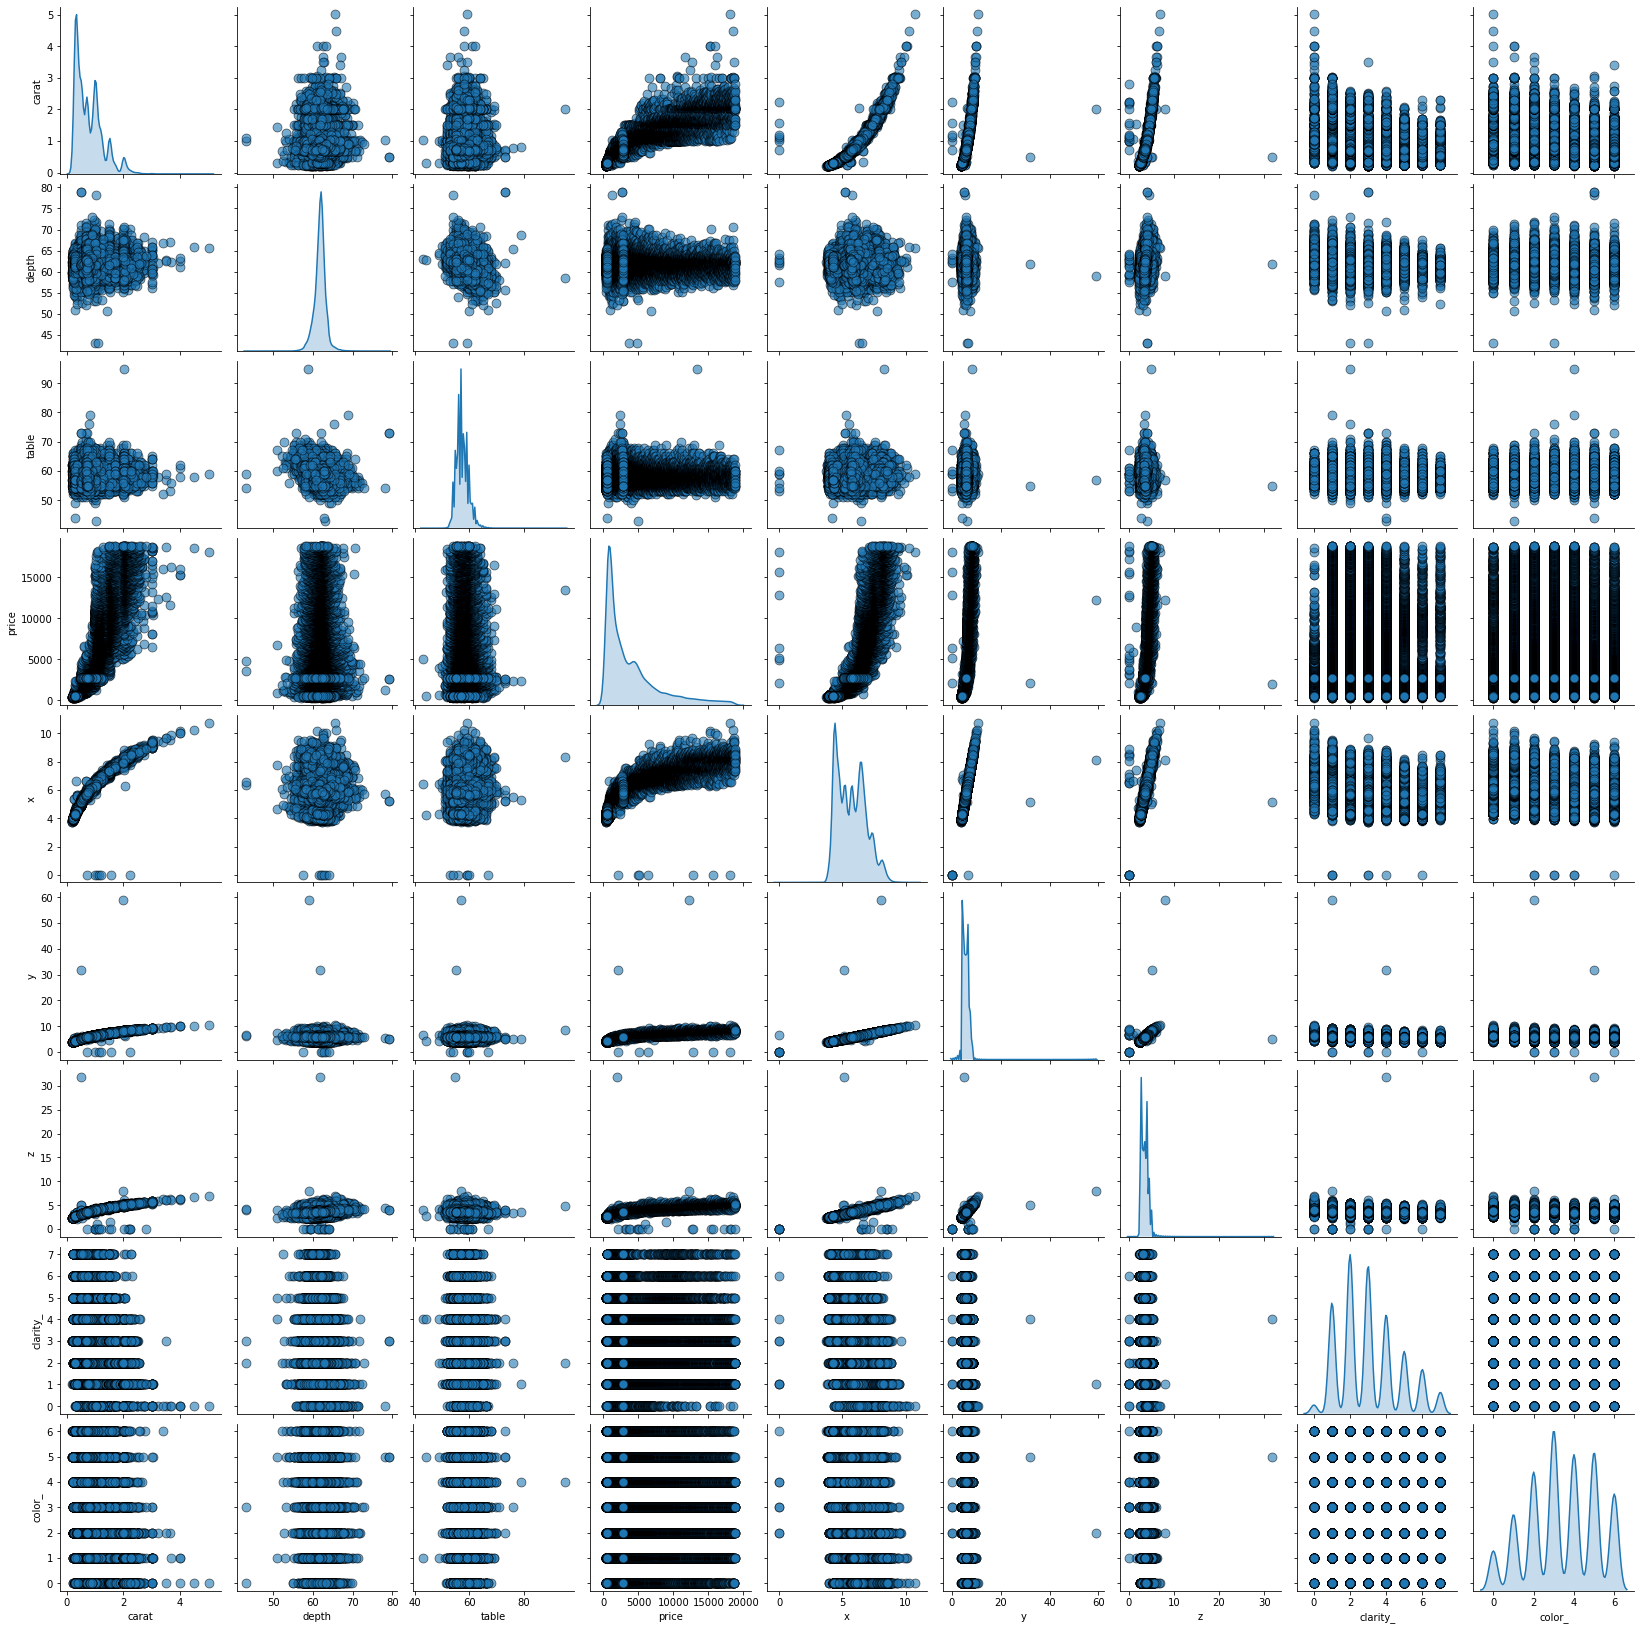

In [9]:
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

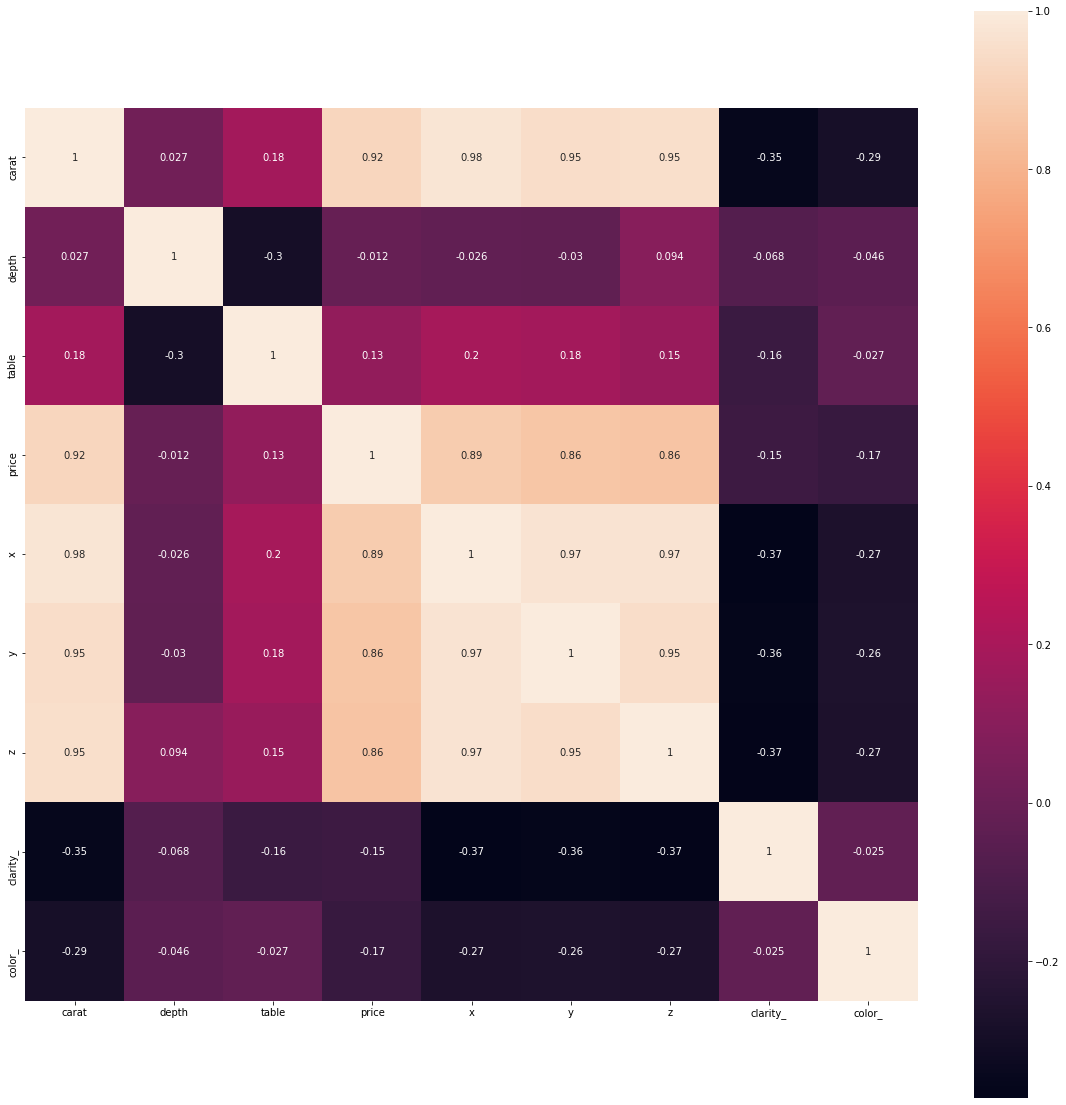

In [10]:
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)

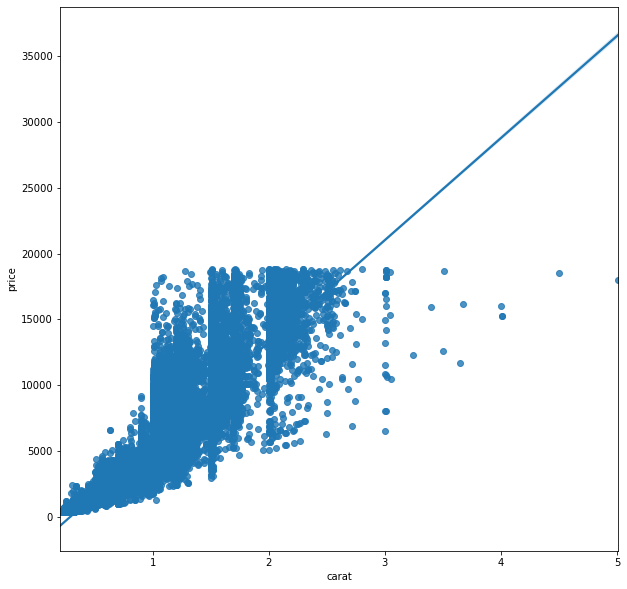

In [11]:
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.carat, diamonds.price, scatter=True)

In [28]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.carat, diamonds.price)
r2 = r_value ** 2
r2

0.8504268875149495

Modelo

In [29]:
from sklearn.linear_model import LinearRegression

X = diamonds[['carat']]
y_obs = diamonds['price']

model = LinearRegression()
model.fit(X, y_obs)

LinearRegression()

In [30]:
y_pre=model.predict(X)

Cálculo do erro do modelo

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
np.sqrt(mean_squared_error(y_obs, y_pre))


1542.8464716474002

Importando dataset dos diamantes de Rick

In [17]:
rick=pd.read_csv("rick_diamonds.csv")

In [19]:
#Tratamento das variáveis categóricas
rick['cut_'] = rick['cut'].replace(
    ["Fair", "Good", "Very Good", "Premium", "Ideal"]
    ,[0,1,2,3,4])
rick['clarity_'] = rick['clarity'].replace(
    ['I1',"SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
    ,[0,1,2,3,4,5,6,7])
rick['color_'] = rick['color'].replace(
    ['J',"I","H","G","F","E","D"]
    ,[0,1,2,3,4,5,6]) 

Aplicação do modelo ao dataset de Rick

In [20]:
X1 = rick[['carat']]
rick["price_predicted"]=model.predict(X1)
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z,cut_,clarity_,color_,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2,1,2,4804.879333
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,1,3,4,692.422362
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4,3,2,1778.731751
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,4,4,3,6279.156361
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,4,1,3,15435.192637


In [21]:
rick.to_csv("rick_test.csv")

In [22]:
""" Mean squared_erro deu 1605.15 com regressão linear com a variável carat"""

' Mean squared_erro deu 1605.15 com regressão linear com a variável carat'

Regressão com mais variávels

In [33]:
X6 = diamonds[['carat','x','y','cut_',"clarity_","color_"]]
y_obs6 = diamonds['price']

model6 = LinearRegression()
model6.fit(X6, y_obs6)

LinearRegression()

In [34]:
y_pre6=model6.predict(X6)

In [35]:
np.sqrt(mean_squared_error(y_obs6, y_pre6))


1214.9946274357258

Aplicando o modelo com mais variáveis ao dataset de rick

In [36]:
X16 = rick[['carat','x','y','cut_',"clarity_","color_"]]

In [41]:
rick["price_predicted"]=model6.predict(X16)
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z,cut_,clarity_,color_,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2,1,2,3189.633889
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,1,3,4,189.453665
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4,3,2,1109.814689
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,4,4,3,6941.106510
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,4,1,3,16491.558446


In [42]:
rick.to_csv("rick_test6.csv")

In [43]:
""" Mean squared_erro deu 1288.46 com regressão linear com a variável carat"""

' Mean squared_erro deu 1288.46 com regressão linear com a variável carat'

In [72]:
#rick=rick.drop(columns=['price_predicted'],axis=1)
rick

,carat,cut,color,clarity,depth,table,x,y,z,cut_,clarity_,color_
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2,1,2
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,1,3,4
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4,3,2
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,4,4,3
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,2,1,6
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,4,5,4
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,2,2,4
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,4,6,4


Análise das variáveis

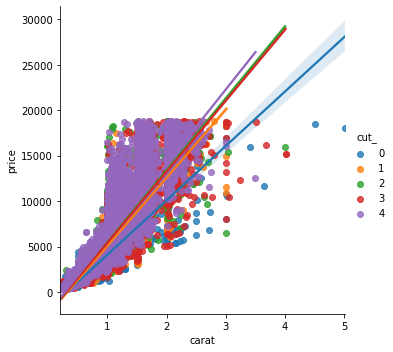

In [44]:
sns.lmplot(data=diamonds, x="carat", y="price", hue="cut_")


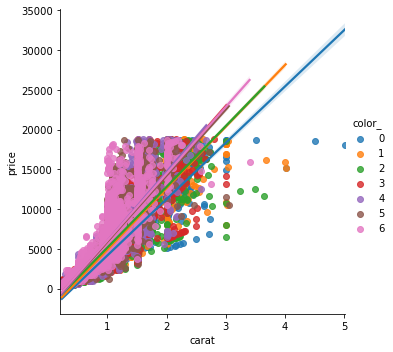

In [45]:
sns.lmplot(data=diamonds, x="carat", y="price", hue="color_")


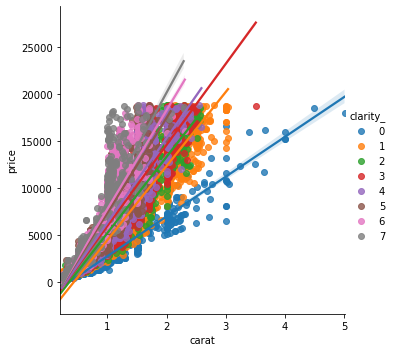

In [46]:
sns.lmplot(data=diamonds, x="carat", y="price", hue="clarity_")


Modelo para clarity = 0

In [47]:
diamonds_clarity0=diamonds.loc[diamonds['clarity_']==0]

In [48]:
diamonds_clarity0

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_,color_,cut_
13,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68,0,5,3
162,1.17,Very Good,J,I1,60.2,61.0,2774,6.83,6.90,4.13,0,0,2
203,1.01,Premium,F,I1,61.8,60.0,2781,6.39,6.36,3.94,0,4,3
227,1.01,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03,0,5,0
294,0.96,Ideal,F,I1,60.7,55.0,2801,6.37,6.41,3.88,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48625,1.22,Premium,G,I1,59.2,60.0,2699,6.97,6.90,4.10,0,3,3
48671,1.05,Very Good,J,I1,59.6,63.0,2705,6.61,6.55,3.92,0,0,2
48761,1.00,Fair,G,I1,61.7,57.0,2723,6.39,6.28,3.91,0,3,0
48880,1.04,Very Good,I,I1,61.6,61.0,2745,6.45,6.47,3.98,0,1,2


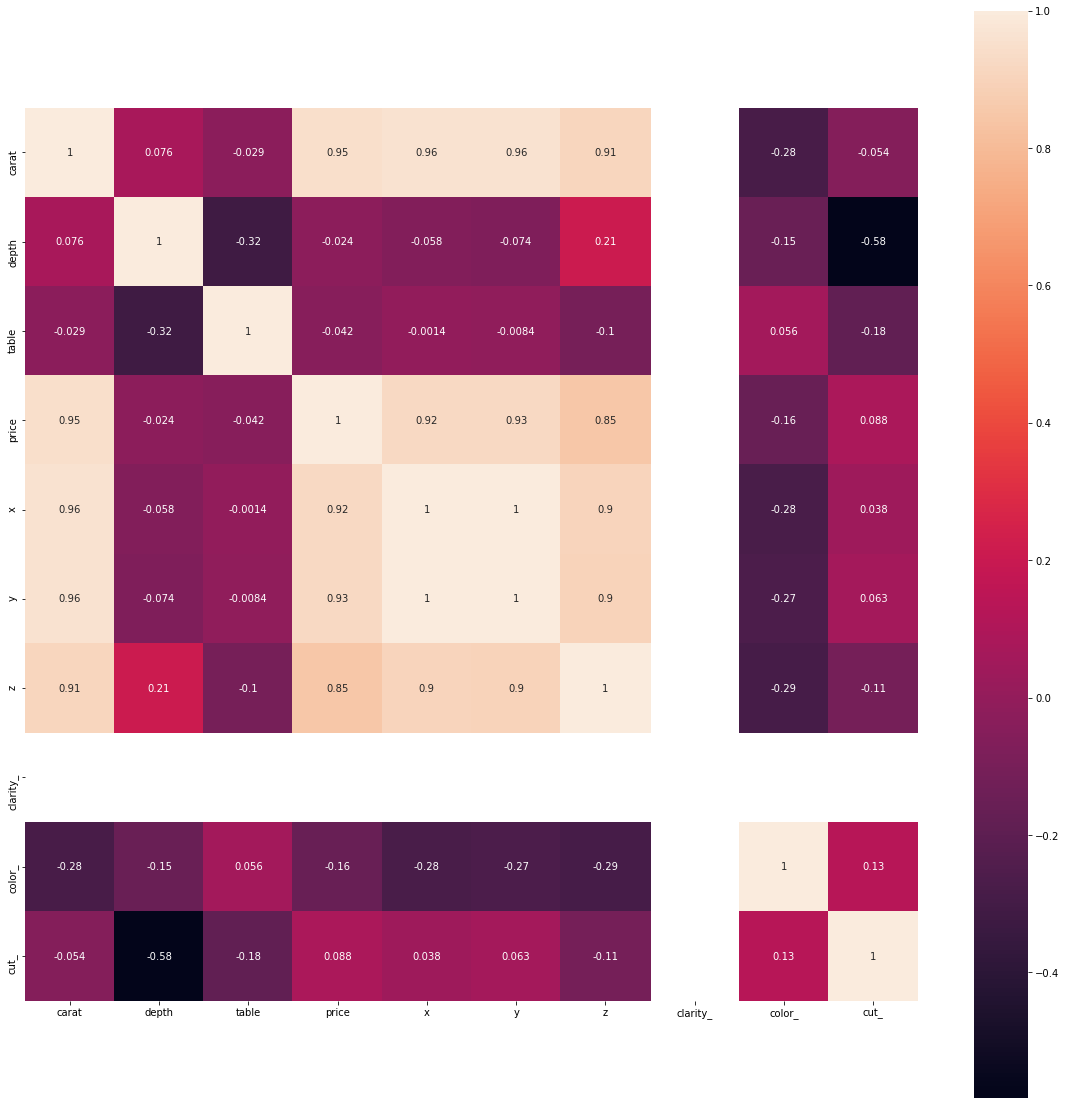

In [50]:
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds_clarity0.corr(), annot=True, square=True)

In [51]:
X_clarity0 = diamonds_clarity0[['carat','x','y','cut_',"clarity_","color_"]]
y_obs_clarity0 = diamonds_clarity0['price']

model_clarity0 = LinearRegression()
model_clarity0.fit(X_clarity0, y_obs_clarity0)

LinearRegression()

In [73]:
rick_0=rick.loc[rick['clarity_']==0]
rick_0

,carat,cut,color,clarity,depth,table,x,y,z,cut_,clarity_,color_
29,0.70,Very Good,I,I1,63.2,59.0,5.62,5.59,3.54,2,0,1
57,0.90,Very Good,F,I1,61.9,59.0,6.16,6.18,3.82,2,0,4
113,1.13,Good,G,I1,63.4,58.0,6.58,6.61,4.18,1,0,3
161,0.70,Very Good,G,I1,61.5,63.0,5.73,5.65,3.50,2,0,3
184,2.32,Fair,H,I1,70.5,55.0,7.93,7.90,5.58,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.06,Ideal,F,I1,62.1,55.0,6.54,6.57,4.07,4,0,4
4673,0.64,Good,F,I1,57.3,64.0,5.75,5.69,3.28,1,0,4
4714,1.03,Good,J,I1,58.2,64.0,6.64,6.69,3.88,1,0,0
4872,1.64,Fair,G,I1,64.5,60.0,7.44,7.35,4.76,0,0,3


In [74]:
Xrick0 = rick_0[['carat','x','y','cut_',"clarity_","color_"]]


In [75]:
rick_0['price_predicted']=model_clarity0.predict(Xrick0)


<ipython-input-75-984bececf2ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rick_0['price_predicted']=model_clarity0.predict(Xrick0)


In [76]:
rick_0

,carat,cut,color,clarity,depth,table,x,y,z,cut_,clarity_,color_,price_predicted
29,0.70,Very Good,I,I1,63.2,59.0,5.62,5.59,3.54,2,0,1,1106.639535
57,0.90,Very Good,F,I1,61.9,59.0,6.16,6.18,3.82,2,0,4,2626.144603
113,1.13,Good,G,I1,63.4,58.0,6.58,6.61,4.18,1,0,3,3313.765776
161,0.70,Very Good,G,I1,61.5,63.0,5.73,5.65,3.50,2,0,3,1304.930705
184,2.32,Fair,H,I1,70.5,55.0,7.93,7.90,5.58,0,0,2,7969.151983
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.06,Ideal,F,I1,62.1,55.0,6.54,6.57,4.07,4,0,4,3733.849846
4673,0.64,Good,F,I1,57.3,64.0,5.75,5.69,3.28,1,0,4,1083.343346
4714,1.03,Good,J,I1,58.2,64.0,6.64,6.69,3.88,1,0,0,2453.893139
4872,1.64,Fair,G,I1,64.5,60.0,7.44,7.35,4.76,0,0,3,5033.348800


Modelo para clarity = 1

In [77]:
diamonds_clarity1=diamonds.loc[diamonds['clarity_']==1]
X_clarity1 = diamonds_clarity1[['carat','x','y','cut_',"clarity_","color_"]]
y_obs_clarity1 = diamonds_clarity1['price']

model_clarity1 = LinearRegression()
model_clarity1.fit(X_clarity1, y_obs_clarity1)



LinearRegression()

In [78]:
rick_1=rick.loc[rick['clarity_']==1]
Xrick1 = rick_1[['carat','x','y','cut_',"clarity_","color_"]]
rick_1['price_predicted']=model_clarity1.predict(Xrick1)



<ipython-input-78-03ce6a5eb317>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rick_1['price_predicted']=model_clarity1.predict(Xrick1)


Modelo para clarity = 2

In [79]:
#Seleção e modelo
diamonds_clarity2=diamonds.loc[diamonds['clarity_']==2]
X_clarity2 = diamonds_clarity2[['carat','x','y','cut_',"clarity_","color_"]]
y_obs_clarity2 = diamonds_clarity2['price']

model_clarity2 = LinearRegression()
model_clarity2.fit(X_clarity2, y_obs_clarity2)

#Seleção do dataFrame de Rick e aplicação do modelo
rick_2=rick.loc[rick['clarity_']==2]
Xrick2 = rick_2[['carat','x','y','cut_',"clarity_","color_"]]
rick_2['price_predicted']=model_clarity2.predict(Xrick2)


<ipython-input-79-1425b3d79f20>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rick_2['price_predicted']=model_clarity2.predict(Xrick2)


Modelo para clarity = 3

In [80]:
#Seleção e modelo
diamonds_clarity3=diamonds.loc[diamonds['clarity_']==3]
X_clarity3 = diamonds_clarity3[['carat','x','y','cut_',"clarity_","color_"]]
y_obs_clarity3 = diamonds_clarity3['price']

model_clarity3 = LinearRegression()
model_clarity3.fit(X_clarity3, y_obs_clarity3)

#Seleção do dataFrame de Rick e aplicação do modelo
rick_3=rick.loc[rick['clarity_']==3]
Xrick3 = rick_3[['carat','x','y','cut_',"clarity_","color_"]]
rick_3['price_predicted']=model_clarity3.predict(Xrick3)


<ipython-input-80-4e56759fd43c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rick_3['price_predicted']=model_clarity3.predict(Xrick3)


Modelo para clarity = 4

In [81]:
#Seleção e modelo
diamonds_clarity4=diamonds.loc[diamonds['clarity_']==4]
X_clarity4 = diamonds_clarity4[['carat','x','y','cut_',"clarity_","color_"]]
y_obs_clarity4 = diamonds_clarity4['price']

model_clarity4 = LinearRegression()
model_clarity4.fit(X_clarity4, y_obs_clarity4)

#Seleção do dataFrame de Rick e aplicação do modelo
rick_4=rick.loc[rick['clarity_']==4]
Xrick4 = rick_4[['carat','x','y','cut_',"clarity_","color_"]]
rick_4['price_predicted']=model_clarity4.predict(Xrick4)




<ipython-input-81-9aeccedf1225>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rick_4['price_predicted']=model_clarity4.predict(Xrick4)


Modelo para clarity = 5

In [83]:
#Seleção e modelo
diamonds_clarity5=diamonds.loc[diamonds['clarity_']==5]
X_clarity5 = diamonds_clarity5[['carat','x','y','cut_',"clarity_","color_"]]
y_obs_clarity5 = diamonds_clarity5['price']

model_clarity5 = LinearRegression()
model_clarity5.fit(X_clarity5, y_obs_clarity5)

#Seleção do dataFrame de Rick e aplicação do modelo
rick_5=rick.loc[rick['clarity_']==5]
Xrick5 = rick_5[['carat','x','y','cut_',"clarity_","color_"]]
rick_5['price_predicted']=model_clarity5.predict(Xrick5)

<ipython-input-83-4b683545d766>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rick_5['price_predicted']=model_clarity5.predict(Xrick5)


Modelo para clarity = 6

In [84]:
#Seleção e modelo
diamonds_clarity6=diamonds.loc[diamonds['clarity_']==6]
X_clarity6 = diamonds_clarity6[['carat','x','y','cut_',"clarity_","color_"]]
y_obs_clarity6 = diamonds_clarity6['price']

model_clarity6 = LinearRegression()
model_clarity6.fit(X_clarity6, y_obs_clarity6)

#Seleção do dataFrame de Rick e aplicação do modelo
rick_6=rick.loc[rick['clarity_']==6]
Xrick6 = rick_6[['carat','x','y','cut_',"clarity_","color_"]]
rick_6['price_predicted']=model_clarity6.predict(Xrick6)

<ipython-input-84-a270d25230da>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rick_6['price_predicted']=model_clarity6.predict(Xrick6)


Modelo para clarity = 7

In [85]:
#Seleção e modelo
diamonds_clarity7=diamonds.loc[diamonds['clarity_']==7]
X_clarity7 = diamonds_clarity7[['carat','x','y','cut_',"clarity_","color_"]]
y_obs_clarity7 = diamonds_clarity7['price']

model_clarity7 = LinearRegression()
model_clarity7.fit(X_clarity7, y_obs_clarity7)

#Seleção do dataFrame de Rick e aplicação do modelo
rick_7=rick.loc[rick['clarity_']==7]
Xrick7 = rick_7[['carat','x','y','cut_',"clarity_","color_"]]
rick_7['price_predicted']=model_clarity7.predict(Xrick7)

<ipython-input-85-c5f0f5b920ce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rick_7['price_predicted']=model_clarity7.predict(Xrick7)


In [88]:
rick_7

,carat,cut,color,clarity,depth,table,x,y,z,cut_,clarity_,color_,price_predicted
9,0.73,Ideal,H,IF,61.6,55.0,5.80,5.82,3.58,4,7,2,4515.920759
19,0.30,Ideal,G,IF,62.2,55.0,4.30,4.32,2.68,4,7,3,616.366433
44,1.26,Very Good,F,IF,60.0,60.0,7.04,7.09,4.24,2,7,4,12007.128096
48,0.32,Ideal,G,IF,61.0,57.0,4.44,4.48,2.72,4,7,3,689.223549
61,0.34,Ideal,E,IF,61.7,56.0,4.46,4.48,2.76,4,7,5,2286.874029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,0.30,Ideal,G,IF,61.8,57.0,4.28,4.31,2.65,4,7,3,625.017326
4915,0.28,Ideal,H,IF,63.0,55.0,4.14,4.19,2.62,4,7,2,-164.717576
4933,0.34,Ideal,D,IF,62.1,57.0,4.46,4.52,2.79,4,7,6,2847.222071
4955,0.31,Ideal,F,IF,62.2,54.0,4.37,4.41,2.73,4,7,4,1271.841687


In [91]:
rickt=pd.concat([rick_0, rick_1,rick_2,rick_3,rick_4,rick_5,rick_6,rick_7])
rickt

,carat,cut,color,clarity,depth,table,x,y,z,cut_,clarity_,color_,price_predicted
29,0.70,Very Good,I,I1,63.2,59.0,5.62,5.59,3.54,2,0,1,1106.639535
57,0.90,Very Good,F,I1,61.9,59.0,6.16,6.18,3.82,2,0,4,2626.144603
113,1.13,Good,G,I1,63.4,58.0,6.58,6.61,4.18,1,0,3,3313.765776
161,0.70,Very Good,G,I1,61.5,63.0,5.73,5.65,3.50,2,0,3,1304.930705
184,2.32,Fair,H,I1,70.5,55.0,7.93,7.90,5.58,0,0,2,7969.151983
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,0.30,Ideal,G,IF,61.8,57.0,4.28,4.31,2.65,4,7,3,625.017326
4915,0.28,Ideal,H,IF,63.0,55.0,4.14,4.19,2.62,4,7,2,-164.717576
4933,0.34,Ideal,D,IF,62.1,57.0,4.46,4.52,2.79,4,7,6,2847.222071
4955,0.31,Ideal,F,IF,62.2,54.0,4.37,4.41,2.73,4,7,4,1271.841687


In [93]:
rickt.to_csv("rick_test.csv")

NameError: name 'ricktt' is not defined